<a href="https://colab.research.google.com/github/SaurabhAradwad/Cardiovascular_Risk_Prediction_presentation/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

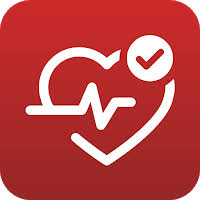

# <b> <u>Problem Statement</u></b>

The Framingham, Massachusetts, residents who participated in the continuing cardiovascular study are the source of the dataset.

Identifying a patient's 10-year risk of certain diseases is the classification's main objective.

coronary heart disease in the future (CHD).

The dataset contains information on the patients. It entails

15 qualities and nearly 4,000 records.

#<b> 01 Installation 🧰 and Basic Imports 📘

In [ ]:
# Mounting google drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installing Dataprep for quick EDA  
!pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.9 MB/s 
     |████████████████████████████████| 764 kB 55.0 MB/s 
     |████████████████████████████████| 1.1 MB 68.4 MB/s 
     |████████████████████████████████| 2.2 MB 55.9 MB/s 
     |████████████████████████████████| 1.0 MB 46.6 MB/s 
     |████████████████████████████████| 1.3 MB 50.9 MB/s 
     |████████████████████████████████| 101 kB 10.2 MB/s 
     |████████████████████████████████| 1.0 MB 59.3 MB/s 
     |████████████████████████████████| 133 kB 71.9 MB/s 
     |████████████████████████████████| 33.8 MB 260 kB/s 
     |████████████████████████████████| 96 kB 3.9 MB/s 
     |████████████████████████████████| 232 kB 74.0 MB/s 
     |████████████████████████████████| 1.6 MB 61.3 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 133 kB 62.1 MB/s 
  Created wheel for metaphone: filen

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

#<b> 02 Import CSV 📁 dataset as 🐼 DataFrame and 🔍 Inspection

## <B> 2.1] Data validation

In [ ]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Capstone Project Folder/03 Superwised ML Classification/data_cardiovascular_risk.csv")

# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# print first 5 rows of the dataset
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# print last 5 rows of the dataset
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [ ]:
# number of rows and columns in the dataset
df.shape

(3390, 17)

This dataset contains total 3390 rows as records and 17 columns as features. 
Here we have validated all available variables, no any specific change after validation. The columns/ features in this dataset are as follows:

**Demographic:**
*  **Sex**: male or female("M" or "F")

*  **Age**: Age of the patient; (Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)


**Medical(history)**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)


**Predict variable (desired target)**
* **10-year risk of coronary heart disease CHD**: (binary: “1”, means “Yes”, “0” means “No”) -DV

**Variables:**

Each attribute is a potential risk factor. 
They consists demographic, behavioral, and medical risk factors.

## <B> 2.2] Missing Value Analysis 

 Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [ ]:
# Importing missing data analysis toolkit
from dataprep.eda import plot_missing


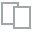
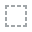
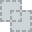
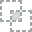
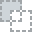
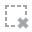
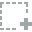
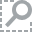
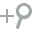
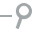
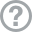
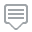
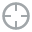
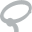
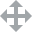
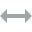
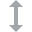
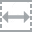
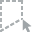
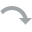
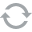
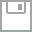
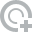
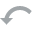
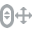
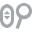
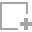
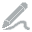
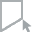
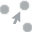
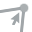
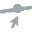

In [ ]:
plot_missing(df)

In [ ]:
# checking for missing values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

 The next single-line code will visualize the location of missing values.

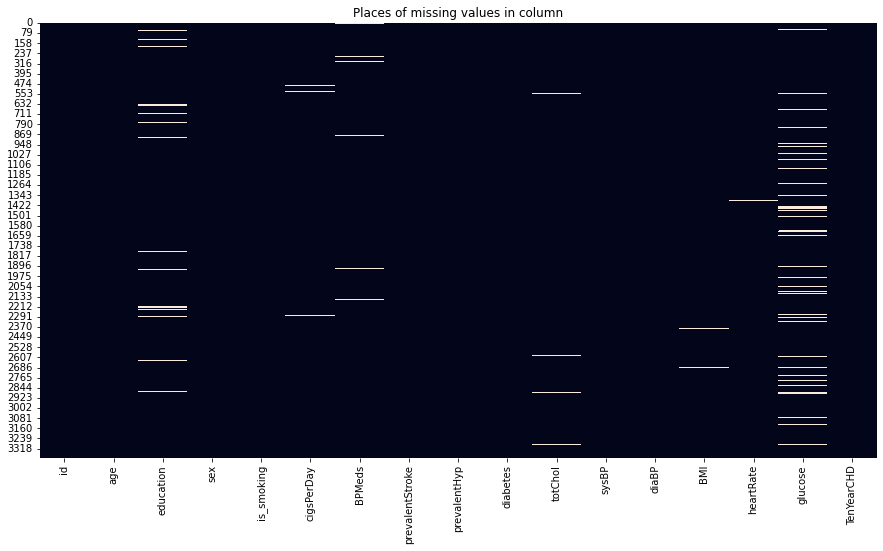

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Places of missing values in column')
sns.heatmap(df.isnull(), cbar=False, ax=ax)
plt.show()

In [ ]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

Total  Percentage
glucose       304    8.967552
education      87    2.566372
BPMeds         44    1.297935
totChol        38    1.120944
cigsPerDay     22    0.648968
BMI            14    0.412979
heartRate       1    0.029499

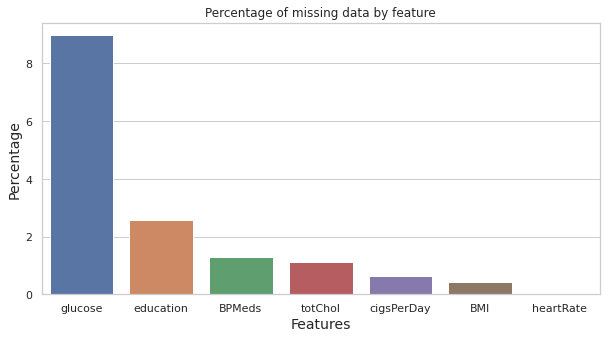

In [ ]:
# Visualizing the percentage of missing data
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [ ]:
# let's count the all rows which are having missing values 
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
# checking missing value percentage 
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  463
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


## <b> 2.3] Data Cleaning

At **8.97%**, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

Since the missing entries account for only **11%** of the total data so, we can drop these entries without losing alot of data.

In [ ]:
# Excluding the missing values
df.dropna(axis=0,inplace=True)

In [ ]:
# Now checking for missing values
df.isnull().any()

id                 False
age                False
education          False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [ ]:
# Checking for any duplicate values 
len(df[df.duplicated()])

0

Dropping education and id columns because it has no correlation with heart disease.

In [ ]:
# Removing columns 'id' & 'education'
df.drop(['id', 'education'], axis= 1, inplace=True)
df.head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1   36   M         NO         0.0     0.0                0             1   
2   46   F        YES        10.0     0.0                0             0   
3   50   M        YES        20.0     0.0                0             1   
4   64   F        YES        30.0     0.0                0             0   
5   61   F         NO         0.0     0.0                0             1   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0  
5         0    272.0  182.0  121.0  32.80       85.0     65.0           1

After cleaning this dataset we have total 15 features for exploratory data analysis. Some Records we have dropeed due as data was missing. 

# <b> 03 Exploratory Data Analysis

## <b> 3.1] Data Description

In [ ]:
# statistical measures about the data
df.describe()

age   cigsPerDay       BPMeds  prevalentStroke  prevalentHyp  \
count  2927.000000  2927.000000  2927.000000      2927.000000   2927.000000   
mean     49.507345     9.112743     0.030065         0.006150      0.314315   
std       8.597191    11.882784     0.170795         0.078192      0.464322   
min      32.000000     0.000000     0.000000         0.000000      0.000000   
25%      42.000000     0.000000     0.000000         0.000000      0.000000   
50%      49.000000     0.000000     0.000000         0.000000      0.000000   
75%      56.000000    20.000000     0.000000         0.000000      1.000000   
max      70.000000    70.000000     1.000000         1.000000      1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  2927.000000  2927.000000  2927.000000  2927.000000  2927.000000   
mean      0.026990   237.129142   132.626409    82.906218    25.797041   
std       0.162082    44.613282    22.326197    12.078873     4.130376   
min       0.000000   113.000000    83.500000    48.000000    15.960000   
25%       0.000000   206.000000   117.000000    74.500000    23.030000   
50%       0.000000   234.000000   128.500000    82.000000    25.380000   
75%       0.000000   264.000000   144.000000    90.000000    28.040000   
max       1.000000   600.000000   295.000000   142.500000    56.800000   

         heartRate      glucose   TenYearCHD  
count  2927.000000  2927.000000  2927.000000  
mean     75.888282    81.934404     0.151691  
std      11.971207    24.106943     0.358783  
min      45.000000    40.000000     0.000000  
25%      68.000000    71.000000     0.000000  
50%      75.000000    78.000000     0.000000  
75%      83.000000    87.000000     0.000000  
max     143.000000   394.000000     1.000000

The features described in the above data set are:

1. **Count:** tells us the number of NoN-empty rows in a feature.

2. **Mean:** tells us the mean value of that feature.

3. **Std:** tells us the Standard Deviation Value of that feature.

4. **Min:** tells us the minimum value of that feature.

5. **25%, 50%, and 75%:** are the percentile/quartile of each features.

6. **Max:** tells us the maximum value of that feature.

## <b> 3.2] Integer Treatment

 Before we go ahead, an important step to do is to convert our string feature  into an integer.
 
  We will name 

*   In **sex** feature  **M** will be converted to **1** and **F** will be converted to **0**.
*   In **is_smoking** feature  **YES** will be converted to **1** and **NO** will be converted to **0**.

In [ ]:
# Applying function to convert string data to an integer
df['sex'] = df['sex'].apply(lambda x : 1 if x == "M" else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [ ]:
# checking the distribution
df['sex'].value_counts()

0    1620
1    1307
Name: sex, dtype: int64

In [ ]:
# checking the distribution
df['is_smoking'].value_counts()

0    1480
1    1447
Name: is_smoking, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   sex              2927 non-null   int64  
 2   is_smoking       2927 non-null   int64  
 3   cigsPerDay       2927 non-null   float64
 4   BPMeds           2927 non-null   float64
 5   prevalentStroke  2927 non-null   int64  
 6   prevalentHyp     2927 non-null   int64  
 7   diabetes         2927 non-null   int64  
 8   totChol          2927 non-null   float64
 9   sysBP            2927 non-null   float64
 10  diaBP            2927 non-null   float64
 11  BMI              2927 non-null   float64
 12  heartRate        2927 non-null   float64
 13  glucose          2927 non-null   float64
 14  TenYearCHD       2927 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 365.9 KB


In [ ]:
df.head()

age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1   36    1           0         0.0     0.0                0             1   
2   46    0           1        10.0     0.0                0             0   
3   50    1           1        20.0     0.0                0             1   
4   64    0           1        30.0     0.0                0             0   
5   61    0           0         0.0     0.0                0             1   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0  
5         0    272.0  182.0  121.0  32.80       85.0     65.0           1

## <b> 3.3] Dataprep Report

In [ ]:
# Imports for EDA from Dataprep
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.datasets import load_dataset

sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)


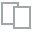
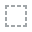
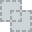
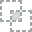
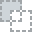
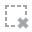
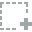
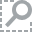
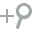
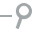
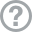
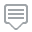
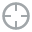
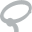
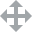
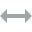
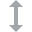
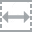
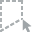
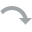
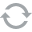
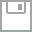
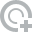
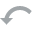
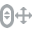
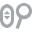
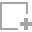
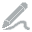
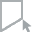
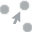
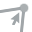
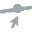

In [ ]:
plot(df) # For analysing distributions

In [ ]:
from dataprep.eda import create_report
report = create_report(df, title='My Report')

In [ ]:
report

## <b> 3.4] Feature Analysis

Target Variable Analysis:

In [ ]:
# checking the distribution of Target Variable
df.TenYearCHD.value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

There are 2547 patients without heart disease and 572 patients with the disease.
* 1 --> Person have risk of coronary heart disease
* 0 --> Person do not have risk of coronary heart disease

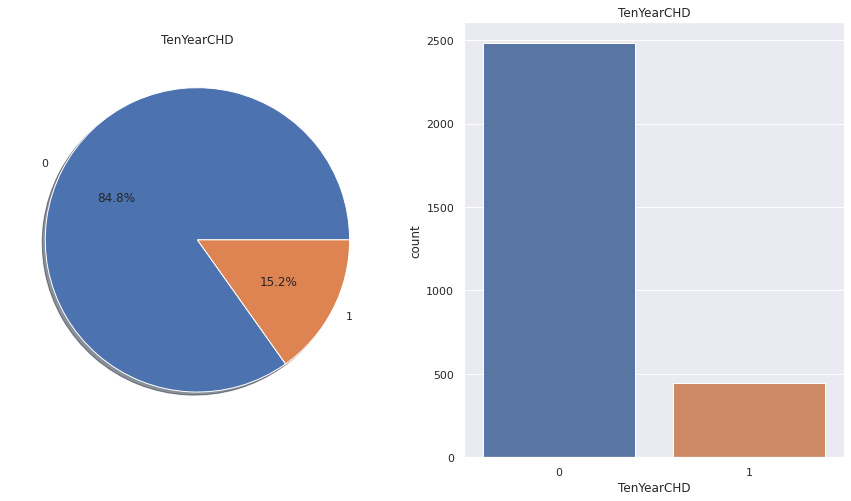

In [ ]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(15,8))
df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')
sns.countplot('TenYearCHD',data=df,ax=ax[1])
ax[1].set_title('TenYearCHD')
plt.show()

We can see above that we have the imbalanced data set as the number of people without the disease greatly exceeds the number of people with the disease.

## <b> 3.5] Feature Selection




In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  519.840881
13       glucose  368.690144
8        totChol  278.418281
0            age  240.058688
3     cigsPerDay  162.115268
10         diaBP   99.495351
6   prevalentHyp   57.413962
7       diabetes   28.483542
4         BPMeds   24.484602
11           BMI   11.161921
1            sex   10.861065


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs       Score
9             sysBP  519.840881
13          glucose  368.690144
8           totChol  278.418281
0               age  240.058688
3        cigsPerDay  162.115268
10            diaBP   99.495351
6      prevalentHyp   57.413962
7          diabetes   28.483542
4            BPMeds   24.484602
11              BMI   11.161921
1               sex   10.861065
5   prevalentStroke    7.870084
12        heartRate    1.942003
2        is_smoking    1.645271

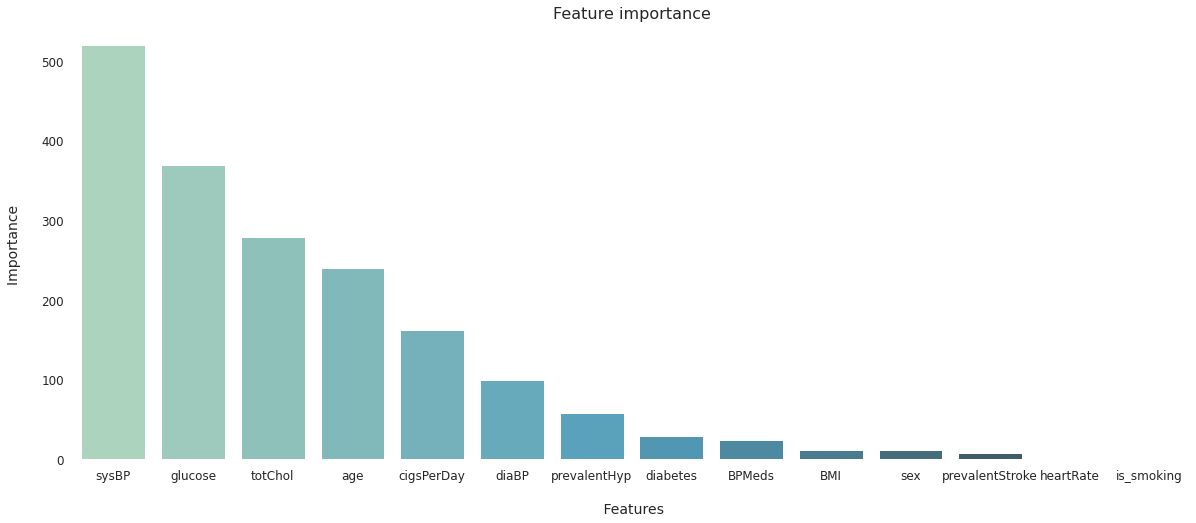

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Comment - Saurabh

## <b> 3.6] Attack on Targate variable

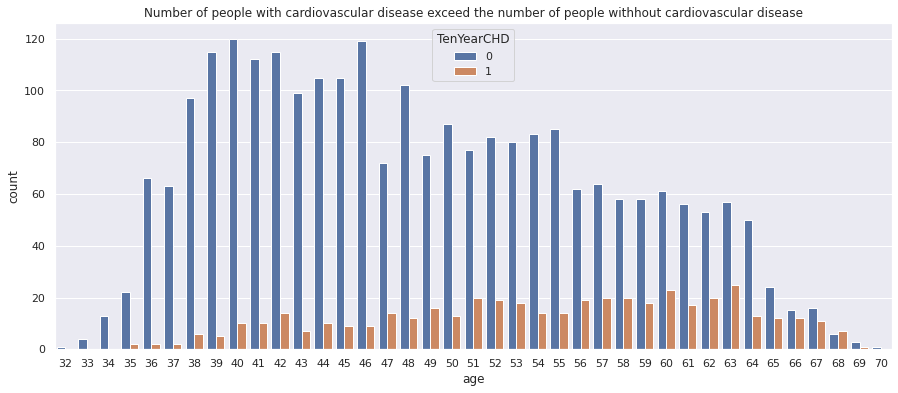

In [ ]:
# Visualising the target and age variable
plt.figure(figsize=[15,6])
plt.title("Number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease")
sns.countplot(data=df, x='age', hue='TenYearCHD');

As we can see in above plot The people with the highest risk of developing heart disease are betwwen the ages of **51 and 63.**

Because the number of sick people generally increases with age.

## <b> 3.7] Categorical variable comparisons


Plotting categorical variables with respect to target variable

In [ ]:
list1 = ["sex","diabetes","is_smoking","prevalentHyp","BPMeds"]

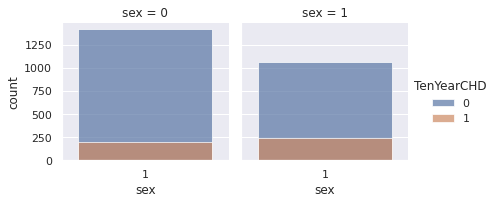

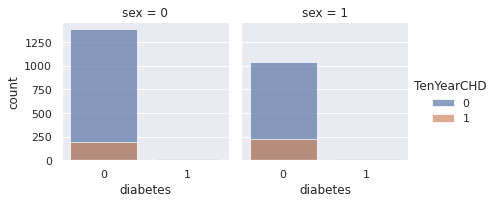

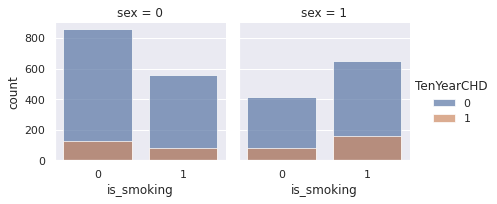

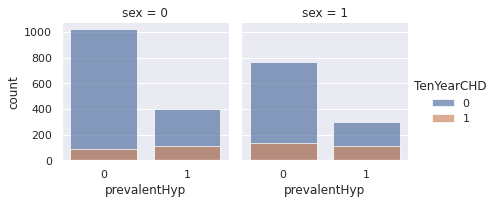

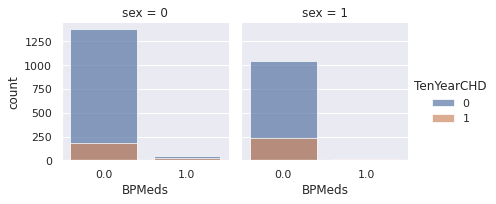

In [ ]:
for item in list1:
  g = sns.FacetGrid(df, col="sex", hue="TenYearCHD")
  g.map(sns.countplot, item , alpha=.7)
  g.add_legend();

From the above categorical variables comparison plot we can conclude that,

*   Slightly more males are suffering from Cardiovascular heart disease than females.
*   The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
*   The percentage of people who have Cardiovascular heart disease is higher among the diabetic patients and also those patients with prevalent hypertension have more risk of Cardiovascular heart disease compare to those who don't have hypertensive problem.
*   The percentage of people who are on medication of blood pressure have more risk of Cardiovascular heart disease compare to those who are not on medication.

# <b> 04 Dealing With Outliers

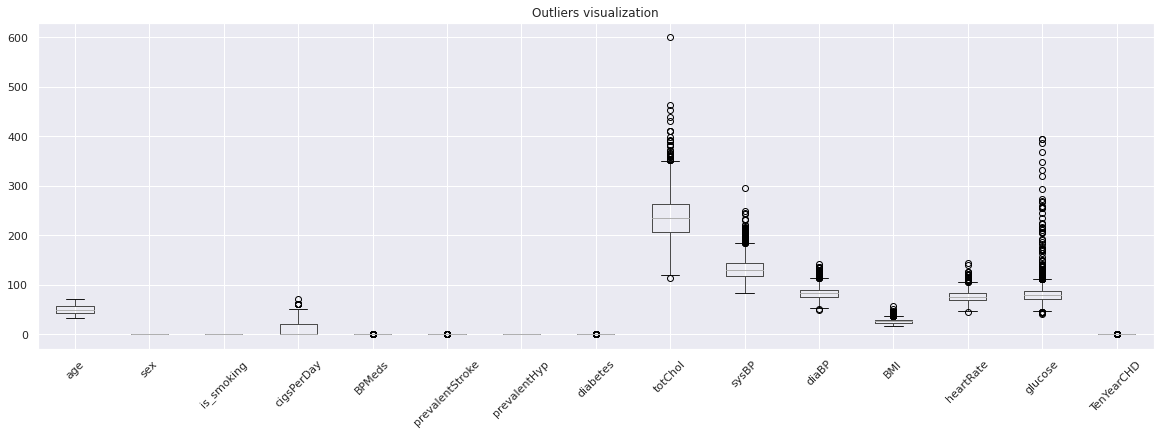

In [ ]:
# Visualize univariate outliers
# Create a plot
fig, ax = plt.subplots(figsize=(20,6))
plt.title("Outliers visualization")
df.boxplot()
# Rotate the x-axis tick labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

# <b> 05 Correlation Analysis

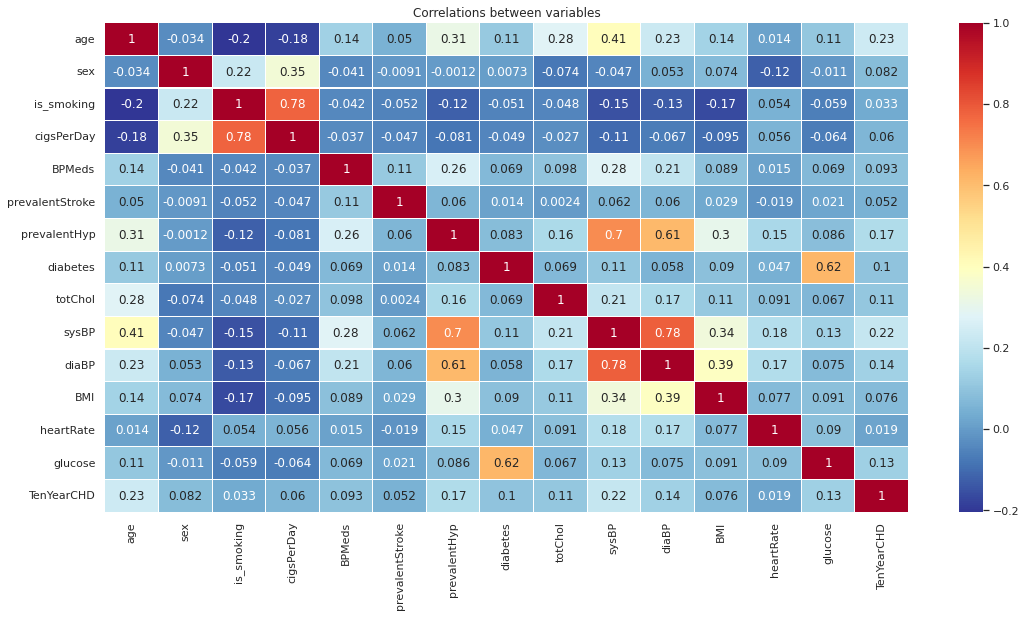

In [ ]:
# Correlations between variables
fig, ax = plt.subplots(figsize=(18,9))  
sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');


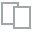
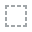
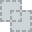
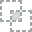
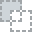
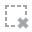
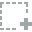
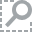
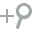
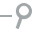
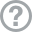
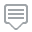
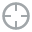
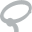
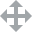
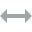
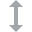
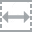
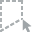
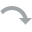
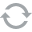
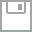
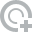
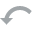
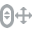
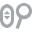
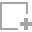
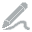
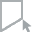
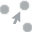
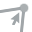
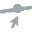

In [ ]:
from dataprep.eda import plot_correlation
plot_correlation(df)


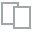
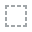
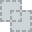
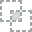
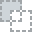
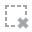
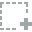
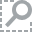
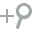
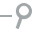
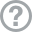
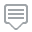
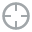
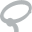
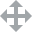
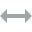
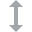
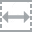
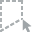
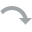
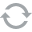
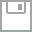
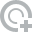
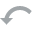
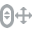
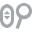
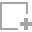
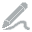
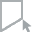
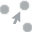
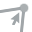
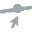

In [ ]:
plot_correlation(df, "TenYearCHD")

**From the above correlation plot we can conclude that**,



*   There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

*   Also there are a couple of features that are highly correlated with each other and it makes no sense to use both of them in building a machine learning model. 

**These includes:** 

*  Blood glucose and diabetes;
*  systolic and diastolic blood pressures;
*  cigarette smoking and the number of cigarretes smoked per day. 

Therefore we need to carry out feature selection to pick the best features. 

# <b> 06 Feature Engineering

## <b> 6.1] Selection of Top Features

**Tree-based: SelectFromModel**

**SelectFromModel** is an Embedded method. Embedded methods use algorithms that have built-in feature selection methods.


Here,

We have used RandomForest() to select features based on feature importance.
We calculate feature importance using node impurities in each decision tree. 

In Random forest, the final feature importance is the average of all decision tree feature importance.

In [ ]:
#define the features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=14)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [ ]:
# Important or top Features
embeded_rf_feature

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

The top features are:

1. Age
2. Total cholesterol
3. Systolic blood pressure
4. Diastolic blood pressure
5. BMI
6. Heart rate
7. Blood glucose

## <b> 6.2] Pairplot for Top Features

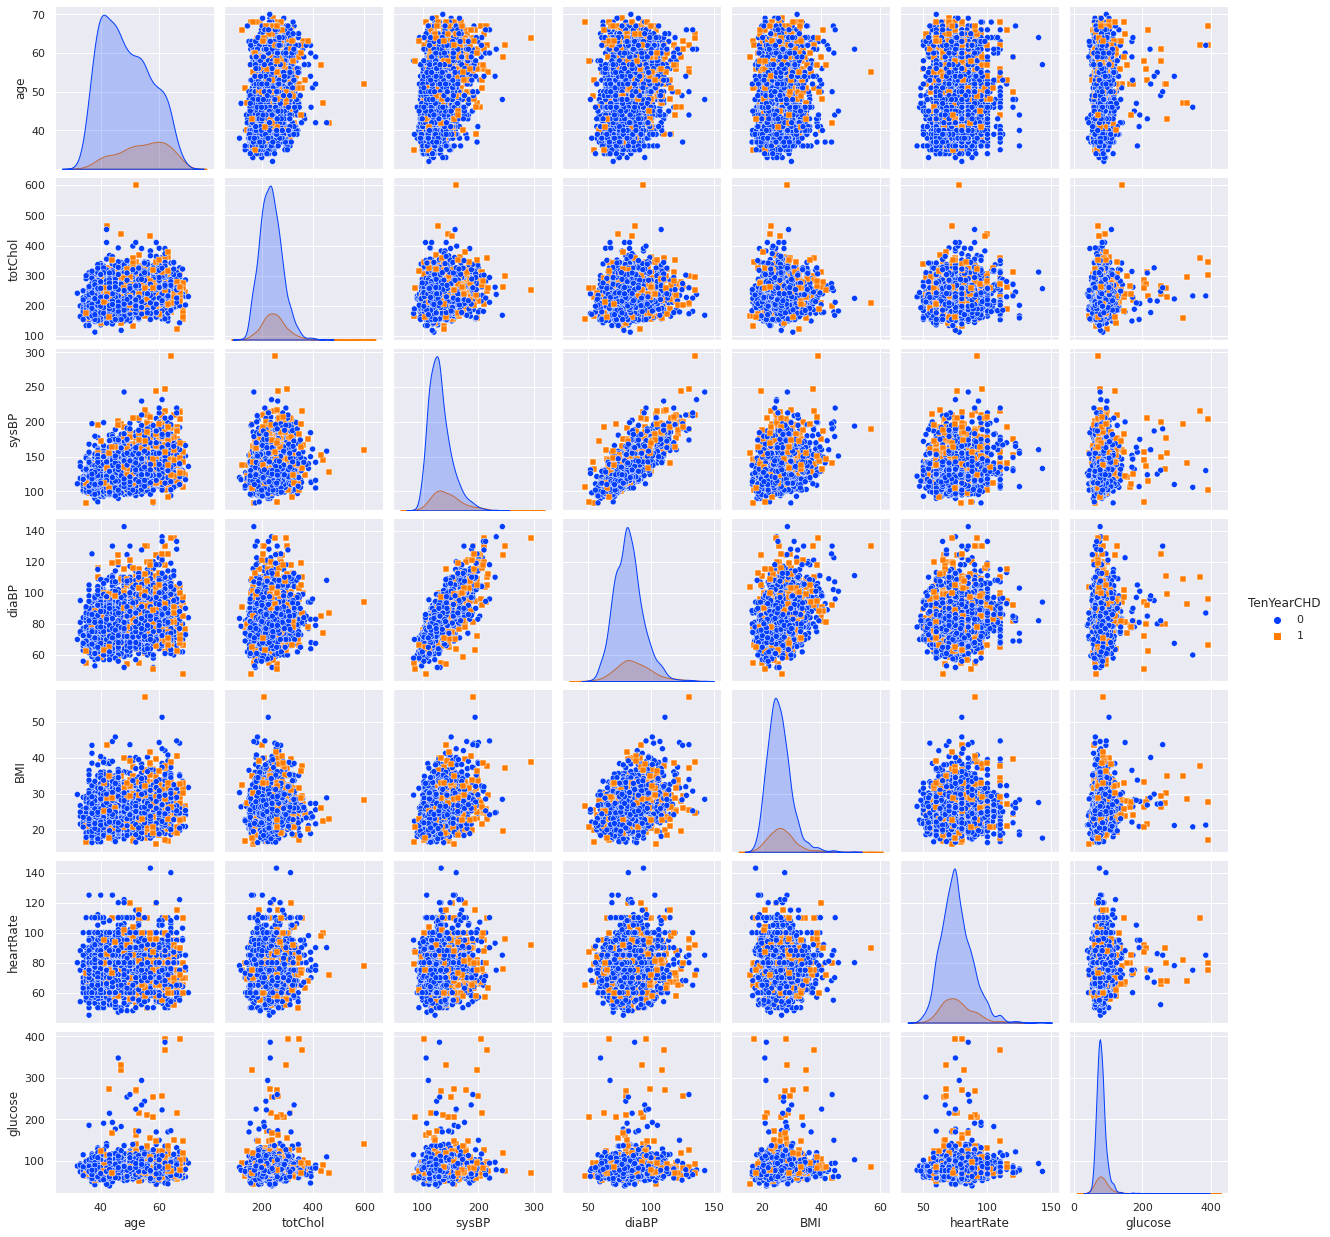

In [ ]:
# Plotting pairplot of top features vs target variable
sns.pairplot(df, hue = 'TenYearCHD', markers=["o", "s"], vars = embeded_rf_feature, palette='bright');

#<b> 07 Preparing dataset for modeling 

## <b> 7.1] SMOT

Since our dataset is imbalanced i.e for every positive case there are about 5-6 negative cases. We may end up with a classifier that is biased to the negative cases. The classifier may have a high accuracy but poor a precision and recall. 

To handle this problem we will balance the dataset using the **Synthetic Minority Oversampling Technique (SMOTE).**

**SMOTE** :

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are then added between the chosen point and its neighbors.

**SMOTE** algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df[embeded_rf_feature]
y = df.iloc[:,-1]
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2927
Resampled dataset shape 4966


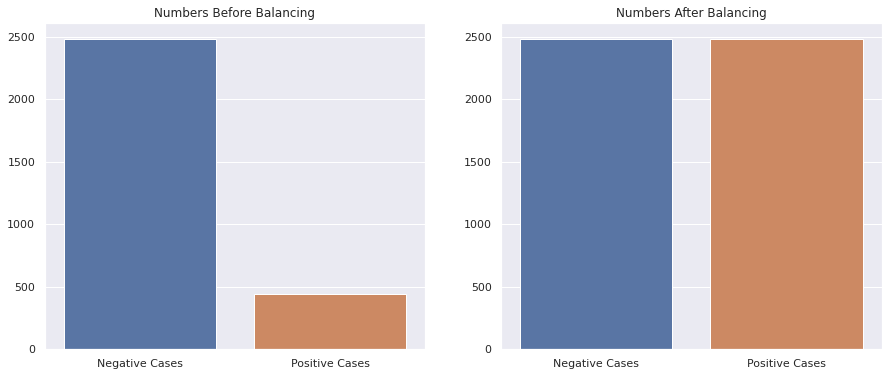

In [ ]:
from collections import Counter
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(dict(Counter(y)).values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(dict(Counter(y_smote)).values()))
plt.title("Numbers After Balancing")
plt.show()

**As seen after applying SMOTE, the new dataset is much more balanced.**

## <b> 7.2] Split

In [ ]:
# First let's create our new dataset
df_new = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1)
df_new.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
df_new.head()

age  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD
0   36    212.0  168.0   98.0  29.77       72.0     75.0           0
1   46    250.0  116.0   71.0  20.35       88.0     94.0           0
2   50    233.0  158.0   88.0  28.26       68.0     94.0           1
3   64    241.0  136.5   85.0  26.42       70.0     77.0           0
4   61    272.0  182.0  121.0  32.80       85.0     65.0           1

In [ ]:
X_new = df_new[embeded_rf_feature]
y_new = df_new["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 3972 records and Testing features have 994 records.


## <b> 7.3] Metrices

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

Comment - Aman

#<b> 08 Classification Models

The four algorithms that we will be using are:

1. **Logistic Regression**
2. **Random Forrest**
3. **XGBoost**
4. **Support Vector Machine**


Here, we will be using **GridsearchCV** search algorithm for above algorithms

In [ ]:
def apply_model(model, X_train, y_train, X_test, y_test):

  model.fit(X_train, y_train)

  model.best_params_

  print('Best Parameters for this model are : ',model.best_params_)

  model_predict = model.predict(X_test)

  model_accuracy = accuracy_score(y_test, model_predict)

  print(f"Using above regression model we get an accuracy of {round(model_accuracy*100, 2)}%")
  print('Train ROC-AUC score : ', model.best_estimator_.score(X_train,y_train))
  print('Test ROC-AUC score : ', model.best_estimator_.score(X_test,y_test))

  # confusion matrix for Model

  cm = confusion_matrix(y_test, model_predict)
  conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  plt.figure(figsize = (8,5))
  sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

  print('\n')

  print('Classification Report For This model is as follows')
  
  print(classification_report(y_test, model_predict))

  return

In [ ]:
def error_plot(model, X_train, y_train, X_test, y_test):

  # ROC curve and AUC
  probs = model.predict_proba(X_test)

  # keep probabilities for the positive outcome only
  probs = probs[:, 1]

  # calculate AUC
  log_auc = roc_auc_score(y_test, probs)
  
  # calculate roc curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)

  # plot curve
  sns.set_style('whitegrid')
  plt.figure(figsize=(10,6))
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.plot(fpr, tpr, marker='.')
  plt.ylabel('True positive rate')
  plt.xlabel('False positive rate')
  plt.title(f"AUC = {round(log_auc,3)}")
  plt.show()

  return

## <b> 8.1] Logistic Regression

**Logistic regression** aims to measure the relationship between a categorical dependent variable and one or more independent variables (usually continuous) by plotting the dependent variables' probability scores.

In [ ]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression

In [ ]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

Best Parameters for this model are :  {'C': 0.0001, 'class_weight': 'balanced', 'penalty': 'l2'}
Using above regression model we get an accuracy of 65.9%
Train ROC-AUC score :  0.6538267875125882
Test ROC-AUC score :  0.6589537223340041


Classification Report For This model is as follows
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       477
           1       0.68      0.66      0.67       517

    accuracy                           0.66       994
   macro avg       0.66      0.66      0.66       994
weighted avg       0.66      0.66      0.66       994

CPU times: user 27.6 s, sys: 22.7 s, total: 50.3 s
Wall time: 29 s


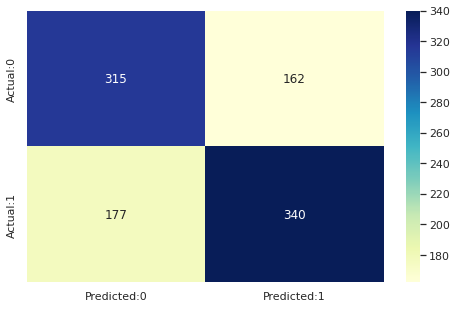

In [ ]:
%%time

apply_model(logistic_clf, X_train, y_train, X_test, y_test)

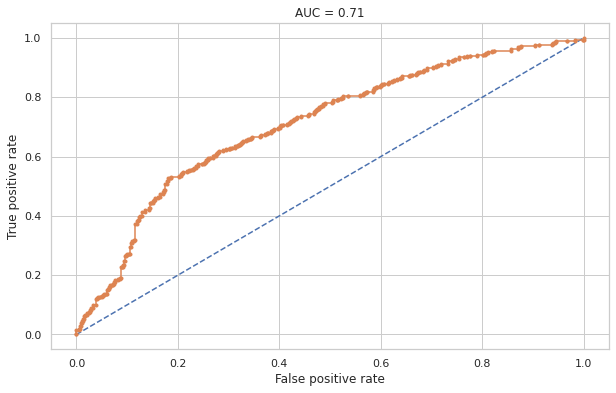

In [ ]:
error_plot(logistic_clf, X_train, y_train, X_test, y_test)

## <b> 8.2] Random Forest

**Random forests** are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance in the final model.

In [ ]:
# Importing required libraries
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# search for optimun parameters using gridsearch
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

random_clf = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,cv=10, scoring='roc_auc')

Best Parameters for this model are :  {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}
Using above regression model we get an accuracy of 72.33%
Train ROC-AUC score :  0.7283484390735147
Test ROC-AUC score :  0.7233400402414487


Classification Report For This model is as follows
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       477
           1       0.72      0.75      0.74       517

    accuracy                           0.72       994
   macro avg       0.72      0.72      0.72       994
weighted avg       0.72      0.72      0.72       994

CPU times: user 2min 55s, sys: 610 ms, total: 2min 55s
Wall time: 3min 9s


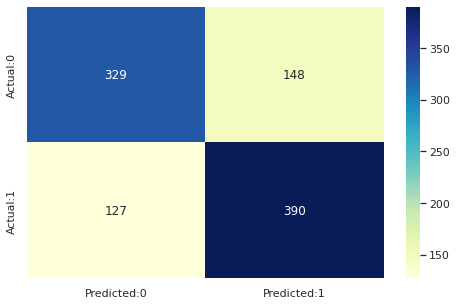

In [ ]:
%%time

apply_model(random_clf, X_train, y_train, X_test, y_test)

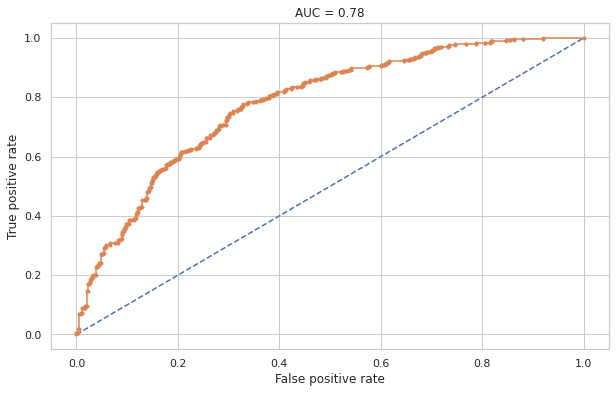

In [ ]:
error_plot(random_clf, X_train, y_train, X_test, y_test)

## <b> 8.3] XG Boost

**XGBoost** stands for eXtreme Gradient Boosting. The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms

In [ ]:
# Importing required libraries
from xgboost import XGBClassifier

In [ ]:
params_xgb = {
    'max_depth': range (2, 12, 1),
    'n_estimators': range(60, 220, 20),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

xgb_clf = GridSearchCV(XGBClassifier(), param_grid = params_xgb, cv = 10, scoring='roc_auc')

Best Parameters for this model are :  {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}
Using above regression model we get an accuracy of 70.82%
Train ROC-AUC score :  0.7235649546827795
Test ROC-AUC score :  0.7082494969818913


Classification Report For This model is as follows
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       477
           1       0.71      0.75      0.73       517

    accuracy                           0.71       994
   macro avg       0.71      0.71      0.71       994
weighted avg       0.71      0.71      0.71       994

CPU times: user 2min 45s, sys: 617 ms, total: 2min 46s
Wall time: 2min 49s


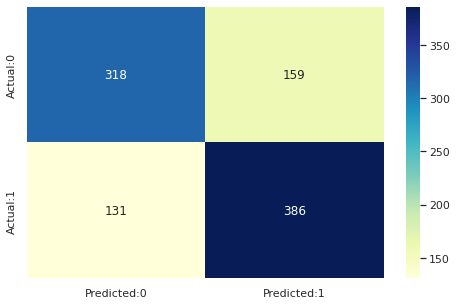

In [ ]:
%%time

apply_model(random_clf, X_train, y_train, X_test, y_test)

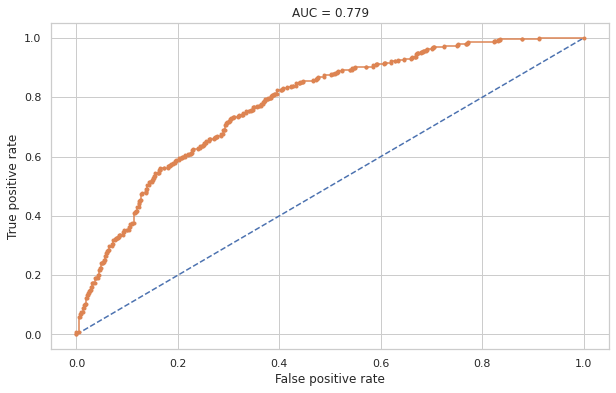

In [ ]:
error_plot(random_clf, X_train, y_train, X_test, y_test)

## <b> 8.4] Support Vector Machine

**Support vector machines (SVMs)** are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. But generally, they are used in classification problems.

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

In [ ]:
# Importing required libraries

from sklearn.svm import SVC

In [ ]:
# Grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

Best Parameters for this model are :  {'C': 10, 'gamma': 0.01}
Using above regression model we get an accuracy of 92.96%
Train ROC-AUC score :  1.0
Test ROC-AUC score :  0.9295774647887324


Classification Report For This model is as follows
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       477
           1       0.92      0.94      0.93       517

    accuracy                           0.93       994
   macro avg       0.93      0.93      0.93       994
weighted avg       0.93      0.93      0.93       994

CPU times: user 13min 34s, sys: 5.09 s, total: 13min 39s
Wall time: 13min 37s


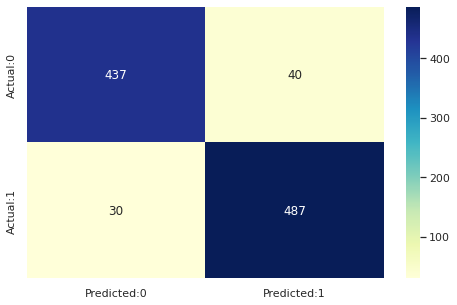

In [ ]:
%%time

apply_model(svm_clf, X_train, y_train, X_test, y_test)

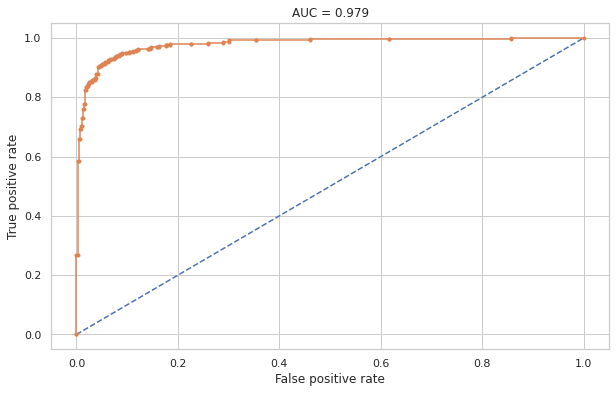

In [ ]:
error_plot(svm_clf, X_train, y_train, X_test, y_test)